In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import scipy.io
from gudhi.representations.preprocessing import BirthPersistenceTransform, DiagramScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from preprocessing import *
from persistent_bow import *
from visualization import *

In [3]:
data_path = "./pd.mat"
data_mat = scipy.io.loadmat(data_path)
data = data_mat["pds"]

In [4]:
# y - labels - type of diagram [0-7]
# We transpose to iterate over diagram list
y = []
for label, diagram_list in enumerate(data.T):
    y += len(diagram_list) * [label]
y = np.array(y)

# data.T = 2d array of diagrams as row, column as type
X = data.T.reshape(-1)

pipe = make_pipeline(BirthPersistenceTransform(), 
               DiagramScaler(use=True, 
                             scalers=[
                                 ((0,), MaxAbsScaler(copy=False)),
                                 ((1,), MaxAbsScaler(copy=False))]))

preprocessed = np.array(pipe.fit_transform(X, y))

# KMeans clustering and PBoW codebook visualization

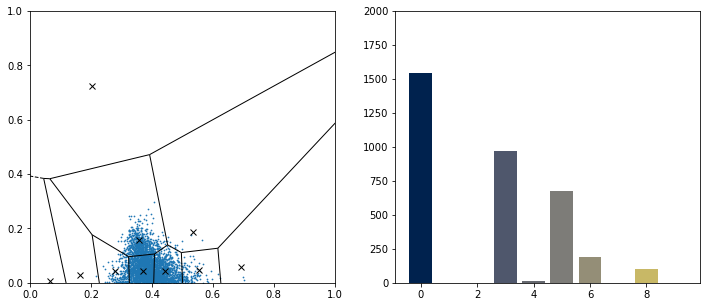

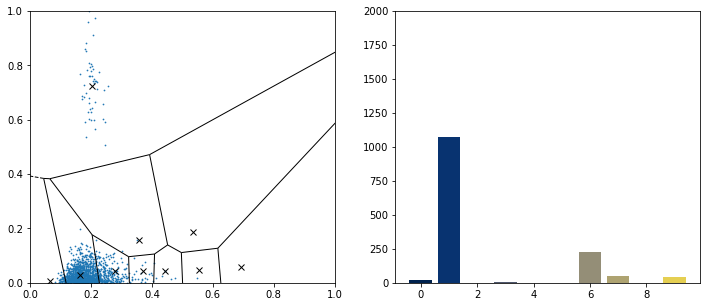

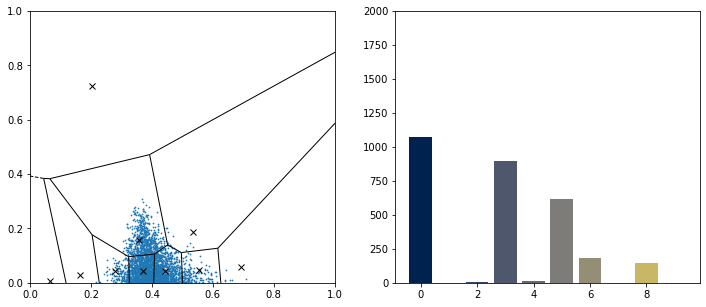

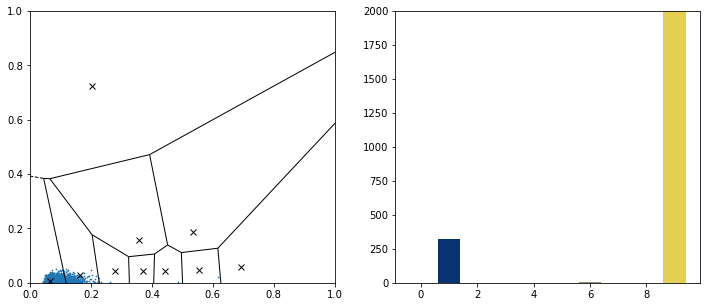

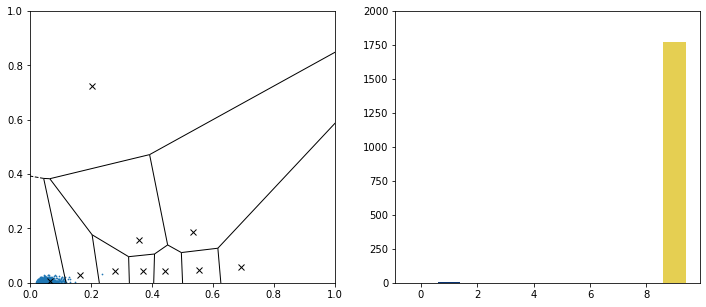

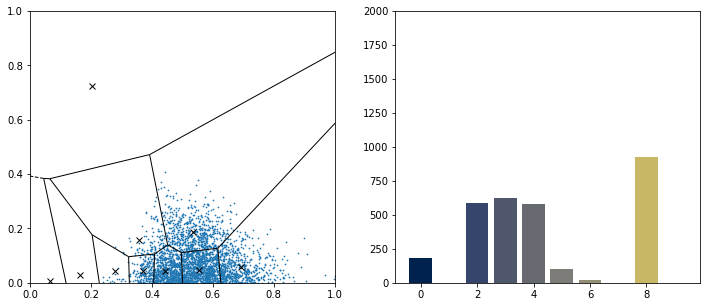

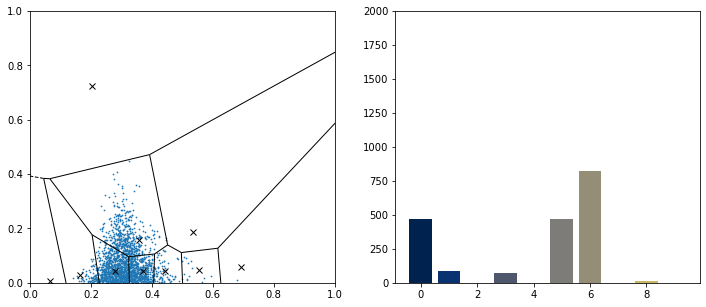

In [5]:
vectorizer = PersistentBow(KMeans(10, random_state=42), transformator=None, scaler=None)
vectorizer.fit(preprocessed)

for label in np.unique(y):    
    class_X = preprocessed[y==label]
    joined_X = np.concatenate(class_X)
    bow = vectorizer.transform([joined_X])[0]
    
    plt.figure(figsize=(12,5))
    ax = plt.subplot(121)
    plot_voronoi(vectorizer.cluster, ax=ax)
    ax.scatter(joined_X[:, 0], joined_X[:, 1], s=0.5)
    ax = plt.subplot(122)
    plot_bow(bow, 2000, ax=ax)